# Definição do Problema

---

O problema consiste em analisar dados das viagens do Uber para identificar padrões, tendências ou insights que possam melhorar a eficiência das viagens, compreender o comportamento dos usuários ou otimizar a operação em áreas específicas.
A análise se concentra em segmentar usuários com base em seus padrões de viagem sem rótulos predefinidos, sendo um problema não supervisionado.

### Premissas sobre o Problema
1.   Viagens mais longas podem ter uma correlação com um valor de tarifa mais alto;
2.   O tempo de solicitação pode influenciar a duração da viagem dependendo do tráfego na cidade naquele momento;
3. A localização inicial e final da viagem podem afetar a distância percorrida.

### Perguntas para responder
1. Como a distância percorrida influencia no valor da tarifa e na duração da viagem?
2. Qual foi o total de viagens completadas nos anos anteriores?
3. Quais foram os valores máximos, mínimos e médios da tarifa, distância percorrida e duração da viagem?
4. Qual foi o montante total das tarifas cobradas por mês e por ano?
5. Quantas viagens foram realizadas por ano, divididas pelos dias da semana?
6. Em que período as tarifas médias foram mais elevadas?
7. Qual foi a velocidade média das viagens realizadas?

### Atributos

Atributos | Definição
--- | :---:
`Cidade` | Nome da cidade onde a viagem ocorreu.
`Tipo de Produto` | Categoria ou tipo específico de serviço oferecido pela Uber, como UberX, Uber Black, Uber Pool, etc.
`Status da Viagem ou Pedido` | Indicação do estado atual da viagem ou do pedido, como "Solicitado", "Em andamento" ou "Concluído".
`Tempo de Solicitação` | Momento em que o usuário fez a solicitação da viagem.
`Hora de Início da Viagem` | Horário em que a viagem começou.
`Início da Viagem Lat./Long.` | Coordenadas de latitude e longitude do ponto de partida da viagem.
`Endereço Inicial da Viagem` | Localização inicial (endereço) de onde a viagem foi solicitada.
`Horário de Entrega` | Horário em que a viagem foi finalizada ou entregue.
`Lat. de Desembarque` | Coordenadas de latitude e longitude do ponto de desembarque ou destino da viagem.
`Entrega de GNL` | Possível indicação se a entrega foi feita através de algum serviço específico chamado GNL.
`Endereço de Entrega` | Localização de destino da viagem (endereço).
`Distância (milhas)` | Distância percorrida durante a viagem, frequentemente medida em milhas.
`Valor da Tarifa` | Montante cobrado ao usuário pela viagem.
`Moeda Tarifária` | A moeda na qual a tarifa foi cobrada (por exemplo, dólar, euro, etc.).




# Estatísticas descritivas

In [10]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

%matplotlib inline

In [11]:
#Importe de arquivo
from google.colab import files
uploaded = files.upload()

import io

uber_df = pd.read_csv(io.BytesIO(uploaded['trips_data.csv']))
uber_df.head()

# Informações sobre viagens de dataframe: tipo de índice e colunas, valores não nulos e uso de memória.
uber_df.info()

Saving trips_data.csv to trips_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  392 non-null    object 
 1   Product Type          357 non-null    object 
 2   Trip or Order Status  392 non-null    object 
 3   Request Time          392 non-null    object 
 4   Begin Trip Time       392 non-null    object 
 5   Begin Trip Lat        356 non-null    float64
 6   Begin Trip Lng        356 non-null    float64
 7   Begin Trip Address    354 non-null    object 
 8   Dropoff Time          392 non-null    object 
 9   Dropoff Lat           356 non-null    float64
 10  Dropoff Lng           356 non-null    float64
 11  Dropoff Address       356 non-null    object 
 12  Distance (miles)      385 non-null    float64
 13  Fare Amount           385 non-null    float64
 14  Fare Currency         385 non-null

In [17]:
# Estatísticas descritivas

# 1. Quantos atributos e instâncias existem?
num_atributos = len(uber_df.columns)
num_instancias = len(uber_df)
print(f"1. Quantidade de Atributos: {num_atributos}")
print(f"   Quantidade de Instâncias: {num_instancias}")

# 2. Quais são os tipos de dados dos atributos?
tipos_de_dados = uber_df.dtypes
print("\n2. Tipos de Dados dos Atributos:")
print(tipos_de_dados)

# 3. Verifique as primeiras linhas do dataset. Algo chama a atenção?
primeiras_linhas = uber_df.head()
print("\n3. Primeiras Linhas do Dataset:")
print(primeiras_linhas)

# 4. Há valores faltantes, discrepantes ou inconsistentes?
valores_faltantes = uber_df.isnull().sum()
valores_discrepantes = uber_df.describe().loc[['min', 'max']].T
print("\n4. Valores Faltantes:")
print(valores_faltantes)
print("\n   Valores Discrepantes (mínimo e máximo):")
print(valores_discrepantes)

# 5. Resumo estatístico dos atributos com valor numérico
resumo_estatistico = uber_df.describe(include='number')
valores_ausentes = uber_df.isnull().sum()
resumo_estatistico = resumo_estatistico.append(valores_ausentes.rename('Valores Ausentes'))
print("\n5. Resumo Estatístico dos Atributos Numéricos:")
print(resumo_estatistico)


1. Quantidade de Atributos: 15
   Quantidade de Instâncias: 392

2. Tipos de Dados dos Atributos:
City                     object
Product Type             object
Trip or Order Status     object
Request Time             object
Begin Trip Time          object
Begin Trip Lat          float64
Begin Trip Lng          float64
Begin Trip Address       object
Dropoff Time             object
Dropoff Lat             float64
Dropoff Lng             float64
Dropoff Address          object
Distance (miles)        float64
Fare Amount             float64
Fare Currency            object
dtype: object

3. Primeiras Linhas do Dataset:
             City Product Type Trip or Order Status  \
0  Rio de Janeiro          NaN            COMPLETED   
1  Rio de Janeiro          NaN            COMPLETED   
2  Rio de Janeiro          NaN            COMPLETED   
3  Rio de Janeiro          NaN            COMPLETED   
4  Rio de Janeiro          NaN            COMPLETED   

                    Request Time            

<ipython-input-17-64d2067c864f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resumo_estatistico = resumo_estatistico.append(valores_ausentes.rename('Valores Ausentes'))


# Tratamento dos Dados

In [19]:
# Renomeando Colunas
uber_df.rename(columns={'City': 'city', 'Product Type': 'product_type', 'Trip or Order Status': 'status',
                      'Request Time': 'request_time', 'Begin Trip Time': 'begin_time', 'Begin Trip Lat': 'begin_lat',
                     'Begin Trip Lng': 'begin_long', 'Dropoff Time': 'dropoff_time', 'Dropoff Lat': 'dropoff_lat',
                      'Dropoff Lng': 'dropoff_long', 'Distance (miles)': 'distance_km','Fare Amount':'fare_amount'}, inplace=True)

In [20]:
# Este trecho de código detecta se há algum valor ausente representado por '?' ou células em branco.
for i in uber_df.columns.tolist():
    if ('?' in uber_df[i].tolist() or ' ' in uber_df[i].tolist()):
        flag = True
    else:
        flag = False
print(flag)
print( )
# Verifica se existe algum valor NaN.
uber_df.isnull().sum()

False



city                   0
product_type          35
status                 0
request_time           0
begin_time             0
begin_lat             36
begin_long            36
Begin Trip Address    38
dropoff_time           0
dropoff_lat           36
dropoff_long          36
Dropoff Address       36
distance_km            7
fare_amount            7
Fare Currency          7
dtype: int64

In [21]:
# Verificando os valores NaN da coluna product_type
uber_df[uber_df.product_type.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency
0,Rio de Janeiro,NaN,COMPLETED,2023-10-25 15:55:58 +0000 UTC,2023-10-25 16:02:20 +0000 UTC,-22.972450,-43.187940,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,2023-10-25 16:11:11 +0000 UTC,-22.964710,-43.174580,"Avenida Prado Júnior, 48 - Copacabana - Rio de...",NaN,NaN,NaN
1,Rio de Janeiro,NaN,COMPLETED,2023-10-25 14:18:46 +0000 UTC,2023-10-25 14:20:30 +0000 UTC,-22.964680,-43.174560,"Avenida Prado Júnior, 48 - Copacabana - Rio de...",2023-10-25 14:32:17 +0000 UTC,-22.972640,-43.188010,"Av. Nossa Senhora de Copacabana, 759 - Copacab...",NaN,NaN,NaN
2,Rio de Janeiro,NaN,COMPLETED,2023-10-24 19:42:48 +0000 UTC,2023-10-24 19:50:31 +0000 UTC,-22.945160,-43.182434,"Pr. De Botafogo, 316 - Botafogo - Rio de Janei...",2023-10-24 19:55:56 +0000 UTC,-22.964529,-43.173935,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",NaN,NaN,NaN
3,Rio de Janeiro,NaN,COMPLETED,2023-10-24 18:27:05 +0000 UTC,2023-10-24 18:37:56 +0000 UTC,-22.964485,-43.174065,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2023-10-24 18:52:50 +0000 UTC,-22.944792,-43.182360,"Pr. De Botafogo 2º And, 300 - Botafogo - Rio d...",NaN,NaN,NaN
4,Rio de Janeiro,NaN,COMPLETED,2023-10-14 22:02:14 +0000 UTC,2023-10-14 22:15:28 +0000 UTC,-22.936653,-43.194300,"Rua Santa Lúcia, 171 - Laranjeiras - Rio de Ja...",2023-10-14 22:28:37 +0000 UTC,-22.964191,-43.174100,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",NaN,NaN,NaN
5,Rio de Janeiro,NaN,UNFULFILLED,2023-10-14 21:55:15 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-22.936650,-43.194298,NaN,1970-01-01 00:00:00 +0000 UTC,-22.936650,-43.194298,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",NaN,NaN,NaN
6,Rio de Janeiro,NaN,CANCELED,2023-10-14 21:53:11 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-22.936650,-43.194298,NaN,1970-01-01 00:00:00 +0000 UTC,-22.936650,-43.194298,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",NaN,NaN,NaN
81,Rio de Janeiro,NaN,UNFULFILLED,2023-05-10 22:14:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
95,Rio de Janeiro,NaN,UNFULFILLED,2023-04-20 22:55:58 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-22.938970,-43.173560,"Avenida Oswaldo Cruz, 67 - Flamengo - Rio de J...",1970-01-01 00:00:00 +0000 UTC,-22.938950,-43.173540,"Avenida Oswaldo Cruz, 67 - Flamengo - Rio de J...",0.0,0.0,BRL
96,Rio de Janeiro,NaN,UNFULFILLED,2023-04-20 22:47:57 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-22.942720,-43.182920,"R. Muniz Barreto, 51 - Botafogo - Rio de Janei...",1970-01-01 00:00:00 +0000 UTC,-22.947400,-43.182610,"Praia de Botafogo, 400 - Botafogo - Rio de Jan...",0.0,0.0,BRL


In [22]:
#Removendo linhas de um DataFrame do pandas em que o valor na coluna 'product_type' seja nulo ou NaN (valores ausentes)
uber_df.dropna(subset = ['product_type'], inplace=True)
uber_df[uber_df.begin_lat.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency
28,Rio de Janeiro,Moto,CANCELED,2023-08-24 21:01:37 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
29,Rio de Janeiro,Moto,CANCELED,2023-08-24 20:59:17 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
105,Rio de Janeiro,UberX,CANCELED,2023-04-13 11:42:40 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
154,Rio de Janeiro,UberX,CANCELED,2023-03-04 21:10:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
249,Sao Paulo,Comfort Planet,CANCELED,2022-10-06 09:48:19 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
261,Rio de Janeiro,UberX,CANCELED,2022-09-21 11:49:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
272,Rio de Janeiro,UberX,CANCELED,2022-08-24 13:43:30 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
286,Teresina,UberX,CANCELED,2022-08-05 20:22:59 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
312,Rio de Janeiro,UberX,CANCELED,2022-04-02 04:50:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
319,Teresina,UberX,CANCELED,2022-03-10 10:47:18 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL


In [23]:
# Realiza a conversão de milas para kilometros
uber_df['distance_km'] = uber_df['distance_km']*1.60934
uber_df.distance_km

7       0.000000
8       1.705900
9       1.738087
10      4.409592
11      3.926790
         ...    
387     6.968442
388     7.370777
389     7.274217
390     5.101608
391    12.440198
Name: distance_km, Length: 357, dtype: float64

In [31]:
#Série contendo contagens de valores únicos das cidades que ocorreram corridas
print('\nContagens de valores únicos das cidades que ocorreram corridas:')
contagem_cidades = uber_df.city.value_counts()
print(contagem_cidades)
# Série contendo contagens de valores exclusivos de tipos de produtos.
print('\nContagens de valores exclusivos de tipos de produtos:')
contagem_produtos = uber_df.product_type.value_counts()
print(contagem_produtos)
# Frequência do status das viagens.
print('\nFrequência do status das viagens:')
contagem_viagens = uber_df.status.value_counts()
print(contagem_viagens)


Contagens de valores únicos das cidades que ocorreram corridas:
Rio de Janeiro    279
Teresina           61
Sao Paulo          16
Petropolis          1
Name: city, dtype: int64

Contagens de valores exclusivos de tipos de produtos:
UberX             348
Black               3
Moto                2
Comfort             2
VIP                 1
Comfort Planet      1
Name: product_type, dtype: int64

Frequência do status das viagens:
COMPLETED          318
CANCELED            37
DRIVER_CANCELED      2
Name: status, dtype: int64


In [32]:
# Obtenha o ano, mês e dia da semana da data da solicitação
def date_convertion(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
        df[col] = pd.to_datetime(df[col])
    return df

uber_df = date_convertion(uber_df, ['request_time', 'begin_time', 'dropoff_time'])

# Obtain the year, month and weekday of request date
uber_df['year'] = uber_df.request_time.map(lambda x: datetime.strftime(x,"%Y"))
uber_df['month'] = uber_df.request_time.map(lambda x: datetime.strftime(x,"%b"))
uber_df['weekday'] = uber_df.request_time.map(lambda x: datetime.strftime(x,"%a"))

In [33]:
# Filtrando linhas em que a data na coluna 'begin_time' é diferente da data na coluna 'dropoff_time'.
uber_df.loc[uber_df['begin_time'].dt.date != uber_df['dropoff_time'].dt.date]

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency,year,month,weekday
210,Rio de Janeiro,UberX,COMPLETED,2022-12-11 23:32:04,2022-12-11 23:42:30,-22.986515,-43.207096,Av. Vieira Souto - Ipanema - Rio de Janeiro - ...,2022-12-12 00:04:38,-22.964396,-43.173880,"Avenida Princesa Isabel, 7, B - Rio de Janeiro...",5.359102,14.93,BRL,2022,Dec,Sun
255,Rio de Janeiro,UberX,COMPLETED,2022-10-04 23:54:06,2022-10-04 23:56:34,-22.964450,-43.173990,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2022-10-05 00:14:37,-22.899038,-43.209656,"Av. Francisco Bicalho, 1 - Santo Cristo, Rio d...",10.830858,26.91,BRL,2022,Oct,Tue
391,Teresina,UberX,COMPLETED,2020-03-02 23:43:53,2020-03-02 23:47:45,-5.072298,-42.751578,"R. Farmacêutico João Carvalho, 5517 - Santa Is...",2020-03-03 00:11:45,-5.136999,-42.807558,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",12.440198,19.51,BRL,2020,Mar,Mon


In [34]:
# Obtendo a duração da viagem (minutos)
uber_df['trip_duration'] = (uber_df['dropoff_time'] - uber_df['begin_time']).dt.total_seconds()/60
uber_df

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency,year,month,weekday,trip_duration
7,Rio de Janeiro,UberX,CANCELED,2023-10-06 22:42:17,1970-01-01 00:00:00,-22.961071,-43.202470,"R. Fonte Da Saudade, 39 - Lagoa - Rio de Janei...",1970-01-01 00:00:00,-22.961071,-43.202470,"R. Fonte Da Saudade, 39 - Lagoa - Rio de Janei...",0.000000,0.00,BRL,2023,Oct,Fri,0.000000
8,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:53:24,2023-10-05 21:55:25,-22.972550,-43.187940,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,2023-10-05 22:13:06,-22.964590,-43.174640,"Avenida Prado Júnior, 48 - Copacabana - Rio de...",1.705900,9.92,BRL,2023,Oct,Thu,17.683333
9,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:05:05,2023-10-05 21:16:36,-22.964490,-43.179670,"Rua Barata Ribeiro, 194 - Copacabana - Rio de ...",2023-10-05 21:29:54,-22.973690,-43.188700,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,1.738087,12.29,BRL,2023,Oct,Thu,13.300000
10,Rio de Janeiro,UberX,COMPLETED,2023-10-05 01:17:18,2023-10-05 01:24:17,-22.947813,-43.183422,R. Prof. Alfredo Gomes - Botafogo - Rio de Jan...,2023-10-05 01:39:14,-22.963785,-43.172140,"Rua Gustavo Sampaio, 732 - Leme - Rio de Janei...",4.409592,16.92,BRL,2023,Oct,Thu,14.950000
11,Rio de Janeiro,UberX,COMPLETED,2023-10-04 20:52:06,2023-10-04 20:56:57,-22.964565,-43.174004,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2023-10-04 21:12:05,-22.947659,-43.182537,"Praia de Botafogo, 400 - Botafogo - Rio de Jan...",3.926790,13.93,BRL,2023,Oct,Wed,15.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Teresina,UberX,COMPLETED,2020-03-13 23:14:06,2020-03-13 23:17:39,-5.136976,-42.807575,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-13 23:36:42,-5.100644,-42.789122,"Av. Abdias Neves, 1649 - Cristo Rei, Teresina ...",6.968442,21.19,BRL,2020,Mar,Fri,19.050000
388,Teresina,UberX,COMPLETED,2020-03-10 10:40:38,2020-03-10 10:48:15,-5.137026,-42.807562,"R. Seis, 356 - Saci, Teresina - PI, 64020-460,...",2020-03-10 11:04:40,-5.105740,-42.764202,"Conj. Dirceu Arcoverde II Qu 159, 9 - Parque I...",7.370777,15.49,BRL,2020,Mar,Tue,16.416667
389,Teresina,UberX,COMPLETED,2020-03-07 11:39:23,2020-03-07 11:45:36,-5.137006,-42.807589,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-07 12:01:28,-5.105634,-42.763874,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",7.274217,13.54,BRL,2020,Mar,Sat,15.866667
390,Teresina,UberX,COMPLETED,2020-03-05 11:14:40,2020-03-05 11:21:08,-5.122359,-42.801298,"Av. Barão de Gurguéia, 3119 - Tabuleta, Teresi...",2020-03-05 11:31:11,-5.105513,-42.764078,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",5.101608,10.66,BRL,2020,Mar,Thu,10.050000


# Análise de dados & Visualizações

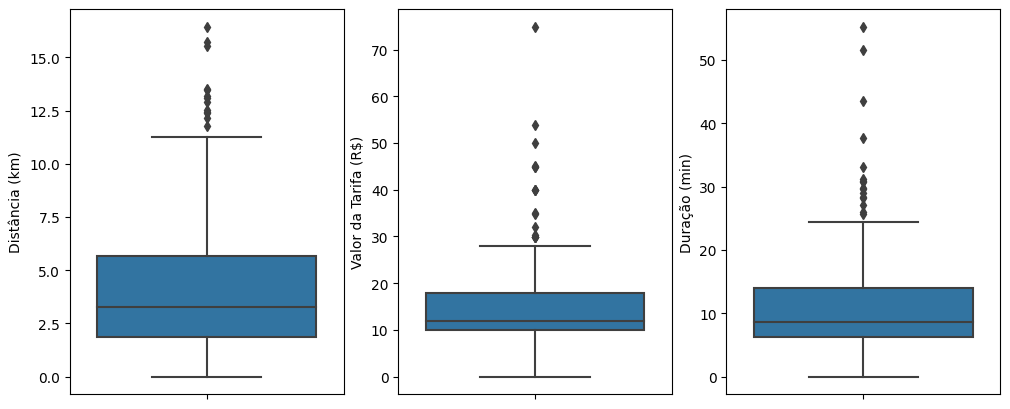

In [36]:
f, axes = plt.subplots(1, 3, figsize=(12,5))

sns.boxplot(data=uber_df, y = 'distance_km', ax=axes[0])
sns.boxplot(data=uber_df, y = 'fare_amount', ax=axes[1])
sns.boxplot(data=uber_df, y = 'trip_duration', ax=axes[2])

axes[0].set_ylabel('Distância (km)')
axes[1].set_ylabel('Valor da Tarifa (R$)')
axes[2].set_ylabel('Duração (min)')

plt.show()

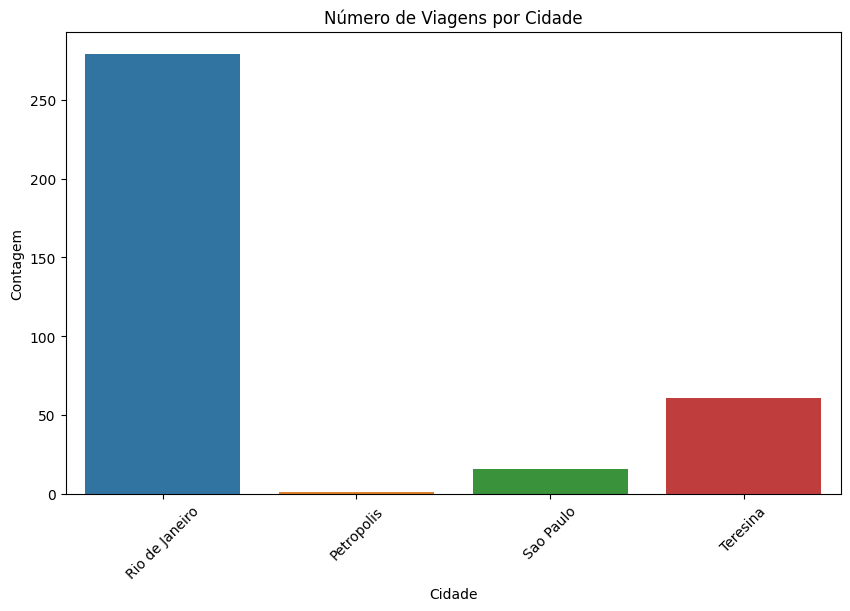

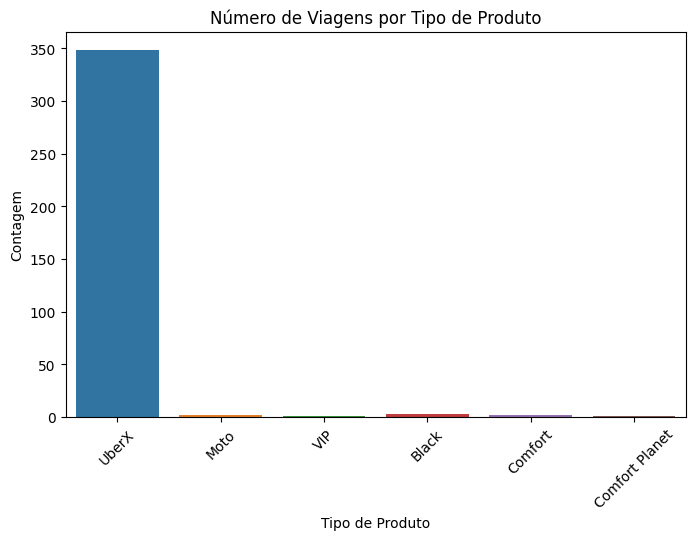

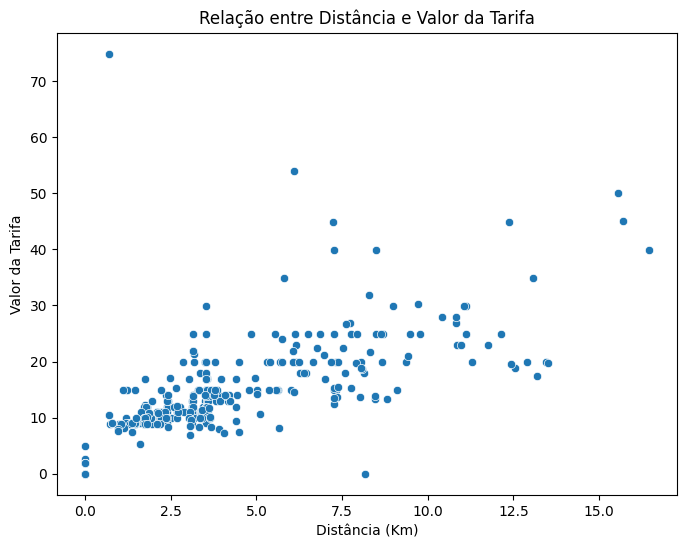

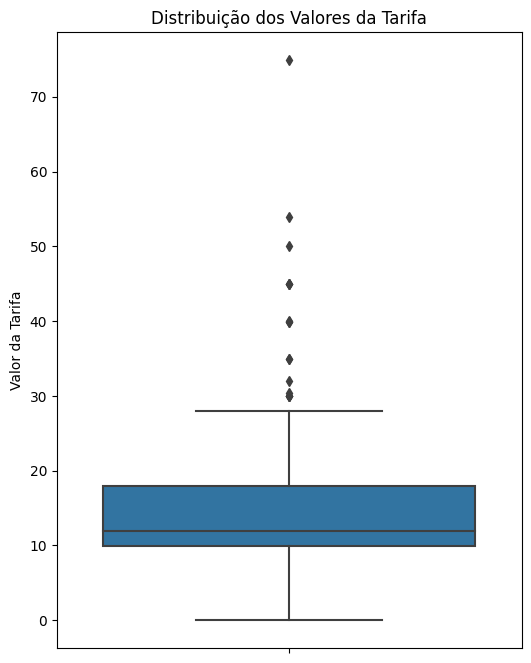

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibir os gráficos diretamente no notebook
%matplotlib inline

# Plotagem de gráficos para as colunas especificadas

# Gráfico de barras para contar o número de ocorrências de cada cidade
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_df, x='city')
plt.title('Número de Viagens por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para contar o número de ocorrências de cada tipo de produto
plt.figure(figsize=(8, 5))
sns.countplot(data=uber_df, x='product_type')
plt.title('Número de Viagens por Tipo de Produto')
plt.xlabel('Tipo de Produto')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Gráfico de dispersão para visualizar a relação entre distância e valor da tarifa
plt.figure(figsize=(8, 6))
sns.scatterplot(data=uber_df, x='distance_km', y='fare_amount')
plt.title('Relação entre Distância e Valor da Tarifa')
plt.xlabel('Distância (Km)')
plt.ylabel('Valor da Tarifa')
plt.show()

# Boxplot para verificar a distribuição dos valores da tarifa
plt.figure(figsize=(6, 8))
sns.boxplot(data=uber_df, y='fare_amount')
plt.title('Distribuição dos Valores da Tarifa')
plt.ylabel('Valor da Tarifa')
plt.show()

## Clusterização

In [39]:
# Selecionando colunas específicas para criar um novo DataFrame
uber_df
col = ['city', 'product_type', 'distance_km', 'fare_amount', 'trip_duration']
uber_ml = uber_df[col]
uber_ml

,city,product_type,distance_km,fare_amount,trip_duration
7,Rio de Janeiro,UberX,0.000000,0.00,0.000000
8,Rio de Janeiro,UberX,1.705900,9.92,17.683333
9,Rio de Janeiro,UberX,1.738087,12.29,13.300000
10,Rio de Janeiro,UberX,4.409592,16.92,14.950000
11,Rio de Janeiro,UberX,3.926790,13.93,15.133333
...,...,...,...,...,...
387,Teresina,UberX,6.968442,21.19,19.050000
388,Teresina,UberX,7.370777,15.49,16.416667
389,Teresina,UberX,7.274217,13.54,15.866667
390,Teresina,UberX,5.101608,10.66,10.050000


In [40]:
# Aplicando o LabelEncoder nas duas primeiras colunas
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
uber_ml[['city', 'product_type']] = uber_ml[['city', 'product_type']].apply(encoder.fit_transform)

uber_ml


<ipython-input-40-b51faef14c21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_ml[['city', 'product_type']] = uber_ml[['city', 'product_type']].apply(encoder.fit_transform)


,city,product_type,distance_km,fare_amount,trip_duration
7,1,4,0.000000,0.00,0.000000
8,1,4,1.705900,9.92,17.683333
9,1,4,1.738087,12.29,13.300000
10,1,4,4.409592,16.92,14.950000
11,1,4,3.926790,13.93,15.133333
...,...,...,...,...,...
387,3,4,6.968442,21.19,19.050000
388,3,4,7.370777,15.49,16.416667
389,3,4,7.274217,13.54,15.866667
390,3,4,5.101608,10.66,10.050000


In [41]:
#Redução de dimensionalidade StandardScaler

from sklearn.preprocessing import StandardScaler


X = uber_ml.iloc[:,0:6].values
scaler=StandardScaler()
X= scaler.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

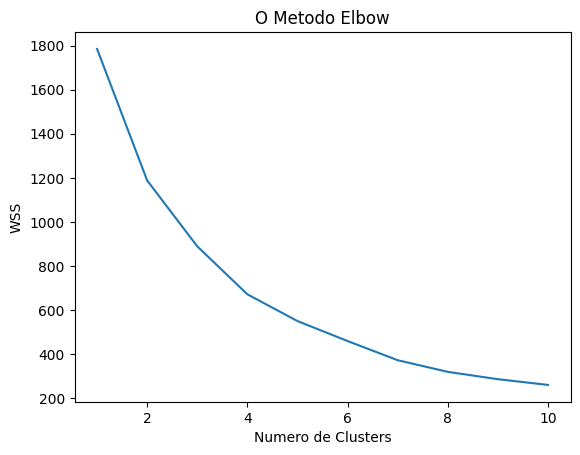

In [43]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=(0))
    kmeans.fit(X)
    #print (i)
    #print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [44]:
uber_ml

,city,product_type,distance_km,fare_amount,trip_duration
7,1,4,0.000000,0.00,0.000000
8,1,4,1.705900,9.92,17.683333
9,1,4,1.738087,12.29,13.300000
10,1,4,4.409592,16.92,14.950000
11,1,4,3.926790,13.93,15.133333
...,...,...,...,...,...
387,3,4,6.968442,21.19,19.050000
388,3,4,7.370777,15.49,16.416667
389,3,4,7.274217,13.54,15.866667
390,3,4,5.101608,10.66,10.050000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


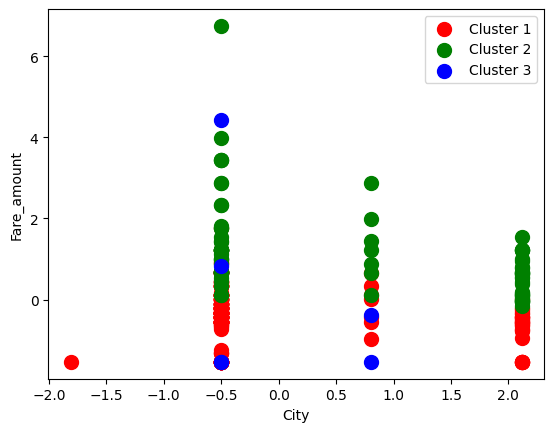

In [45]:
#K-Means, K = 3

kmeans = KMeans(n_clusters=3, random_state = 0)
previsoes = kmeans.fit_predict(X)

#Plot Clusters

plt.scatter(X[previsoes == 0,0], X[previsoes == 0, 3], s=100, c='red', label = 'Cluster 1' )
plt.scatter(X[previsoes == 1,0], X[previsoes == 1, 3], s=100, c='green' , label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2, 3], s=100, c='blue' , label = 'Cluster 3')
plt.xlabel('City')
plt.ylabel('Fare_amount')
plt.legend()